In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import *
from extract_latest_data import  *

### Extract sources of sidewalks in the three cities
(And store as csv)

In [4]:
cities = ['sea', 'chi','nyc']

for city in cities:
    src = defaultdict(int)
    h = LatestHandler()
    h.read_parsed_data(city)
    sidewalks = h.filter_data(sidewalk_qualifier)
    for s in sidewalks:
        tags = s[1]
        if('source' in tags):
            src[tags.get('source')] += 1


    df = pd.DataFrame.from_dict(src.items())
    df.columns = ['source', 'count']
    df.to_csv('data/sources/%s.csv'%(city), index = False)

### Read CSV of sidewalk sources

In [3]:
chi = pd.read_csv('data/sources/chi.csv').sort_values(by=['count'], ascending=False)
sea = pd.read_csv('data/sources/sea.csv').sort_values(by=['count'], ascending=False)
nyc = pd.read_csv('data/sources/nyc.csv').sort_values(by=['count'], ascending=False)

### Plot count of sources for the three cities

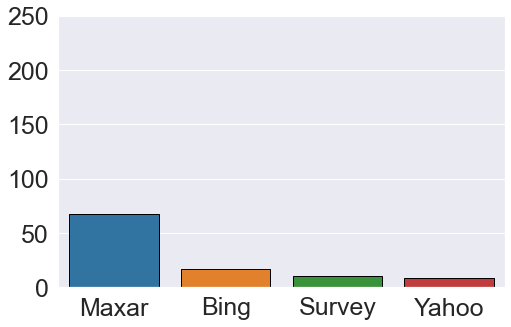

In [8]:
sns.set(rc = {'figure.figsize':(8,5)})

plt.xticks(fontsize='25')
plt.yticks(fontsize='25')

ax = sns.barplot(data = sea[:4], x = 'source', y='count', palette = 'tab10', edgecolor='black', linewidth=1)

# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value

#         # we change the bar width
#         patch.set_width(new_value)

#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .50)

ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticklabels(['Maxar','Bing','Survey','Yahoo'])
ax.set_ylim([0, 250])

plt.savefig("data/plots/Fig6/sea.pdf", format="pdf", bbox_inches="tight")
plt.show()

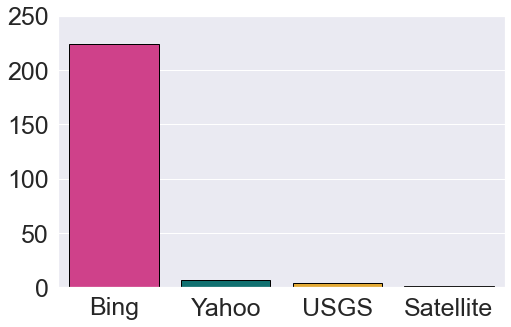

In [9]:
sns.set(rc = {'figure.figsize':(8,5)})

plt.xticks(fontsize='25')
plt.yticks(fontsize='25')

ax = sns.barplot(data = chi, x = 'source', y='count', palette = ['#e7298a', '#008080', '#FFB318', '#32174d'], edgecolor='black', linewidth=1)

ax.set_ylim([0, 250])
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.savefig("data/plots/Fig6/chi.pdf", format="pdf", bbox_inches="tight")
plt.show()

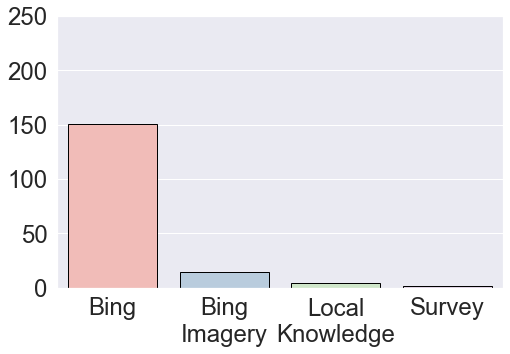

In [10]:
sns.set(rc = {'figure.figsize':(8,5)})

plt.xticks(fontsize='24')
plt.yticks(fontsize='24')

ax = sns.barplot(data = nyc, x = 'source', y='count', palette = 'Pastel1', edgecolor='black', linewidth=1)

ax.set_ylim([0, 250])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticklabels(['Bing', 'Bing\nImagery', 'Local\nKnowledge', 'Survey'])

plt.savefig("data/plots/Fig6/nyc.pdf", format="pdf", bbox_inches="tight")
plt.show()